<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
# your code goes here
df['ConvertedComp'].head()

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

In [4]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:>

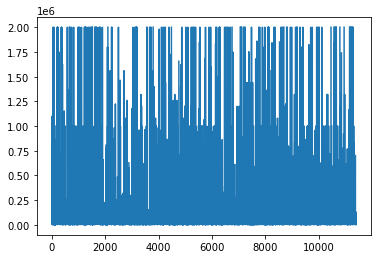

In [5]:
df['ConvertedComp'].plot(kind='line')

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

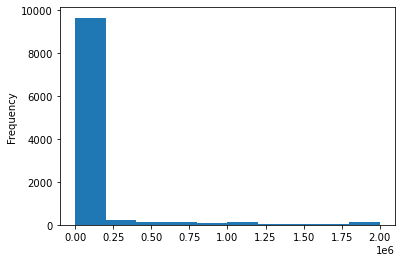

In [6]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')

In [7]:
df['Age'].median()


29.0

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
df[['Age']].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

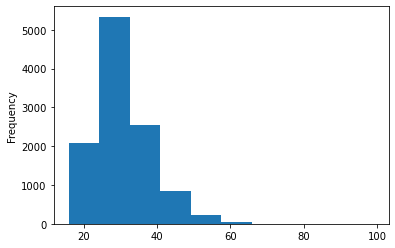

In [12]:
# your code goes here
df['Age'].plot(kind='hist')

<AxesSubplot:>

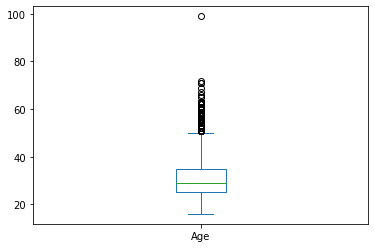

In [29]:
df['Age'].plot(kind='box')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [13]:
# your code goes here
df1=df.dropna()
df1.shape

(1008, 85)

<AxesSubplot:>

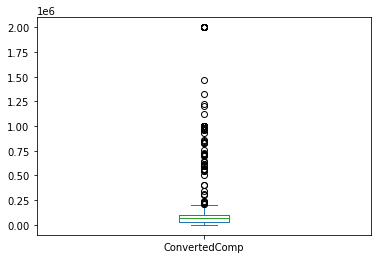

In [14]:
df1['ConvertedComp'].plot(kind='box')

In [15]:
import numpy as np
df['ConvertedComp'].dropna(axis=0,inplace=True)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 -Q1
IQR

73132.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [16]:
# your code goes here
q1 = df.ConvertedComp.quantile(0.25)
q3 = df.ConvertedComp.quantile(0.75)
iqr = q3-q1
print(f'Inter Quartile range: {q3 - q1}')

Inter Quartile range: 73132.0


Find out the upper and lower bounds.


In [17]:
# your code goes here
L_bound=0
U_bound=Q3+(1.5*IQR)
L_bound,U_bound

(0, 209698.0)

In [18]:
Out=df['ConvertedComp'][df['ConvertedComp']>U_bound]
Out.index

Int64Index([    3,    13,    45,    46,    60,    70,    71,    76,   104,
              111,
            ...
            11263, 11264, 11274, 11276, 11282, 11296, 11303, 11350, 11353,
            11369],
           dtype='int64', length=879)

Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# your code goes here
data_convert=df['ConvertedComp'].drop(axis=0,index=Out.index)
data_convert.median()

52704.0

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [20]:
# your code goes here
df3 = df.drop(axis=0,index=Out.index)
df3.shape

(10519, 85)

In [21]:
df3.median()

C:\Users\FAHAD.000\AppData\Local\Temp\ipykernel_17636\3131045010.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.median()


Respondent       12483.0
CompTotal        63000.0
ConvertedComp    52704.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

In [22]:
df3.mean()

C:\Users\FAHAD.000\AppData\Local\Temp\ipykernel_17636\3891983329.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.mean()


Respondent        12488.961023
CompTotal        724396.341298
ConvertedComp     59883.208389
WorkWeekHrs          41.895813
CodeRevHrs            4.809352
Age                  30.647298
dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
# your code goes here
df3.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
